In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import partial_dependence as part
import multiprocessing

plt.style.use('ggplot')

/Users/nathancho/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nathancho/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
claims = pd.read_csv('claims.csv')

In [3]:
claims[claims['PolicyId'] == 93258]

,PolicyId,ClaimDate,ClaimedAmount,PaidAmount
44854,93258,2016-04-25,11.33,10.2
44855,93258,2016-04-25,11.33,10.2
44856,93258,2016-04-25,11.33,10.2


In [4]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144910 entries, 0 to 144909
Data columns (total 4 columns):
PolicyId         144910 non-null int64
ClaimDate        144910 non-null object
ClaimedAmount    144910 non-null float64
PaidAmount       144910 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.4+ MB


In [5]:
policy = pd.read_csv('policy.csv')

In [6]:
policy.head()

,PolicyId,EnrollDate,CancelDate,MonthlyPremium
0,92597,2010-12-07,NaN,34.54
1,92808,2010-11-09,NaN,18.54
2,93090,2010-11-11,NaN,23.53
3,93122,2010-11-11,NaN,44.02
4,93133,2010-11-11,NaN,32.46


In [7]:
policy['MonthlyPremium'] = policy['MonthlyPremium'].fillna(policy['MonthlyPremium'].mean())

In [8]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
PolicyId          100000 non-null int64
EnrollDate        100000 non-null object
CancelDate        13219 non-null object
MonthlyPremium    100000 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


In [9]:
insurance = pd.merge(policy, claims, on='PolicyId', how='inner')

In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144910 entries, 0 to 144909
Data columns (total 7 columns):
PolicyId          144910 non-null int64
EnrollDate        144910 non-null object
CancelDate        16093 non-null object
MonthlyPremium    144910 non-null float64
ClaimDate         144910 non-null object
ClaimedAmount     144910 non-null float64
PaidAmount        144910 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.8+ MB


In [28]:
insurance

,PolicyId,EnrollDate,CancelDate,MonthlyPremium,ClaimDate,ClaimedAmount,PaidAmount,EnrollYear,EnrollMonth,EnrollDay,ClaimYear,ClaimMonth,ClaimDay,Churn,TotalNumberOfClaims,CustomerPaidAmount,DaysToClaim,TotalPolicyHolderPaid
0,93090,2010-11-11,1970-01-01,23.53,2016-02-23,152.01,66.10,2010,11,11,2016,2,23,0,3.0,85.91,1930,433.03
1,93090,2010-11-11,1970-01-01,23.53,2016-02-23,100.00,0.00,2010,11,11,2016,2,23,0,3.0,100.00,1930,433.03
2,93090,2010-11-11,1970-01-01,23.53,2016-10-05,510.48,263.36,2010,11,11,2016,10,5,0,3.0,247.12,2155,433.03
3,93258,2010-11-11,2016-05-24,21.66,2016-04-25,11.33,10.20,2010,11,11,2016,4,25,1,3.0,1.13,1992,3.39
4,93258,2010-11-11,2016-05-24,21.66,2016-04-25,11.33,10.20,2010,11,11,2016,4,25,1,3.0,1.13,1992,3.39
5,93258,2010-11-11,2016-05-24,21.66,2016-04-25,11.33,10.20,2010,11,11,2016,4,25,1,3.0,1.13,1992,3.39
6,1324,2009-05-11,1970-01-01,38.84,2016-03-05,130.95,117.86,2009,5,11,2016,3,5,0,7.0,13.09,2490,439.66
7,1324,2009-05-11,1970-01-01,38.84,2016-11-10,90.81,0.00,2009,5,11,2016,11,10,0,7.0,90.81,2740,439.66
8,1324,2009-05-11,1970-01-01,38.84,2016-11-10,45.79,0.00,2009,5,11,2016,11,10,0,7.0,45.79,2740,439.66
9,1324,2009-05-11,1970-01-01,38.84,2016-11-10,89.88,0.00,2009,5,11,2016,11,10,0,7.0,89.88,2740,439.66


In [12]:
insurance['EnrollDate'] = pd.to_datetime(insurance['EnrollDate'])

In [13]:
insurance['CancelDate'] = pd.to_datetime(insurance['CancelDate'])

In [14]:
insurance['ClaimDate'] = pd.to_datetime(insurance['ClaimDate'])

In [15]:
insurance['EnrollYear'] = insurance['EnrollDate'].dt.year

In [16]:
insurance['EnrollMonth'] = insurance['EnrollDate'].dt.month

In [17]:
insurance['EnrollDay'] = insurance['EnrollDate'].dt.day

In [18]:
insurance['ClaimYear'] = insurance['ClaimDate'].dt.year

In [19]:
insurance['ClaimMonth'] = insurance['ClaimDate'].dt.month

In [20]:
insurance['ClaimDay'] = insurance['ClaimDate'].dt.day

In [21]:
insurance['CancelDate'] = insurance['CancelDate'].fillna(0)

In [22]:
insurance['Churn'] = np.where(insurance['CancelDate'] == '1970-01-01', 0, 1)

In [23]:
insurance['TotalNumberOfClaims'] = insurance.groupby(['PolicyId'])['MonthlyPremium'].transform('count')

In [24]:
insurance['CustomerPaidAmount'] = insurance['ClaimedAmount'] - insurance['PaidAmount']

In [25]:
insurance['DaysToClaim'] = insurance['ClaimDate'] - insurance['EnrollDate']

In [26]:
insurance['DaysToClaim'] = insurance['DaysToClaim'].dt.days

In [27]:
insurance['TotalPolicyHolderPaid'] = insurance.groupby(['PolicyId'])['CustomerPaidAmount'].transform('sum')

# ROC Function

In [29]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df

In [30]:
def plot_roc(ax, df): 
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr))
    ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel("fpr")
    ax.set_ylabel("tpr")
    ax.set_title('ROC')

In [31]:
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision)
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel("recall")
    ax.set_ylabel("precision")
    ax.set_title('Precision/Recall')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

In [32]:
X = insurance[[
               'MonthlyPremium',
               'ClaimedAmount',
               'PaidAmount',
               'EnrollMonth',
               'EnrollDay',
               'ClaimMonth',
               'ClaimDay',
               'TotalNumberOfClaims',
               'CustomerPaidAmount',
               'DaysToClaim',
               'TotalPolicyHolderPaid']]

y = insurance['Churn']

# Logistic Regression!!

In [209]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [210]:
y_test_prob = model.predict(X_test)
y_train_prob = model.predict(X_train)

In [211]:
probs_test = model.predict_proba(X_test)
probs_train = model.predict_proba(X_train)

In [220]:
print(metrics.accuracy_score(y_test, y_test_prob))
print(metrics.roc_auc_score(y_test, probs_test[:,1]))
print(metrics.recall_score(y_test, y_test_prob))
print(metrics.precision_score(y_test,y_test_prob))

0.885282102241
0.650858736102
0.000241779497099
0.0454545454545


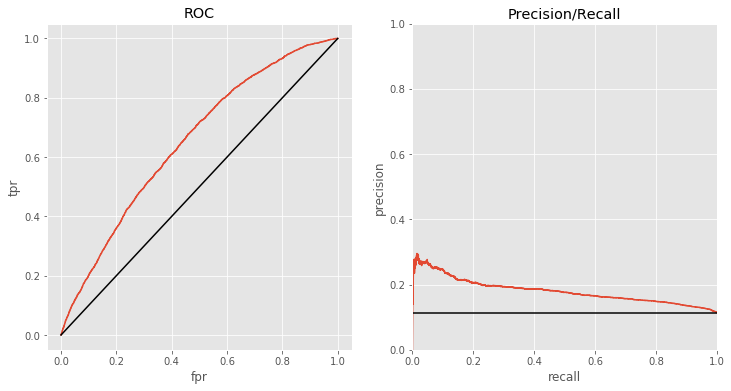

In [223]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
df = calculate_threshold_values(probs_test[:,1], y_test)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)

# Gradient Boosted Regression Trees

In [280]:
params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
          'max_depth': [4,6],
          'min_samples_leaf': [3,5,9,17],
          'max_features': [1.0, 0.3, 0.1]}

In [297]:
model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3)

In [290]:
gs_cv = GridSearchCV(model2, params, cv=3, n_jobs=multiprocessing.cpu_count(), verbose=3).fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=3 
[CV] max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=3 
[CV] max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=3 
[CV] max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=5 
[CV]  max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=3, score=0.898007 -  19.8s
[CV] max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=5 
[CV]  max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=3, score=0.895848 -  19.8s
[CV] max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=5 
[CV]  max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=5, score=0.896627 -  20.0s
[CV] max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=9 
[CV]  max_features=1.0, learning_rate=0.1, max_depth=4, min_samples_leaf=3, score=0.896489 -  20.4s
[CV] max_feat

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.6min


[CV]  max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=3, score=0.891686 -   5.1s
[CV] max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=5 
[CV]  max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=3, score=0.892210 -   4.9s
[CV] max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=5 
[CV]  max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=3, score=0.892094 -   4.8s
[CV] max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=9 
[CV]  max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=5, score=0.891300 -   4.7s
[CV] max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=9 
[CV]  max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=5, score=0.892045 -   4.4s
[CV] max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=9 
[CV]  max_features=0.1, learning_rate=0.1, max_depth=4, min_samples_leaf=5, score=0.892066 -   4.6s
[CV]  max_features=0.1, l

[CV]  max_features=0.1, learning_rate=0.1, max_depth=6, min_samples_leaf=17, score=0.895517 -  11.5s
[CV] max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=5 
[CV]  max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=3, score=0.893121 -  28.8s
[CV] max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=5 
[CV]  max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=3, score=0.893226 -  28.6s
[CV] max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=5 
[CV]  max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=5, score=0.893508 -  28.6s
[CV] max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=9 
[CV]  max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=3, score=0.893729 -  29.2s
[CV] max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=9 
[CV]  max_features=1.0, learning_rate=0.05, max_depth=4, min_samples_leaf=5, score=0.893171 -  28.6s
[CV] max_featu

[CV] max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=3 
[CV]  max_features=1.0, learning_rate=0.05, max_depth=6, min_samples_leaf=17, score=0.897422 - 1.1min
[CV] max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=3 
[CV]  max_features=1.0, learning_rate=0.05, max_depth=6, min_samples_leaf=17, score=0.898062 - 1.1min
[CV] max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=5 


[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 10.9min


[CV]  max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=3, score=0.896931 -  18.3s
[CV] max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=5 
[CV]  max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=3, score=0.896594 -  17.6s
[CV] max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=5 
[CV]  max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=3, score=0.896848 -  18.3s
[CV] max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=9 
[CV]  max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=5, score=0.896793 -  17.7s
[CV] max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=9 
[CV]  max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=5, score=0.896378 -  19.1s
[CV] max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=9 
[CV]  max_features=0.3, learning_rate=0.05, max_depth=6, min_samples_leaf=9, score=0.897262 -  18.5s
[CV] max_featu

[CV] max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=3 
[CV]  max_features=0.3, learning_rate=0.02, max_depth=4, min_samples_leaf=17, score=0.890051 -  10.1s
[CV] max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=5 
[CV]  max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=3, score=0.889975 -   7.1s
[CV] max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=5 
[CV]  max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=3, score=0.889975 -   7.2s
[CV] max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=5 
[CV]  max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=3, score=0.889996 -   7.2s
[CV] max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=9 
[CV]  max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=5, score=0.889975 -   7.2s
[CV] max_features=0.1, learning_rate=0.02, max_depth=4, min_samples_leaf=9 
[CV]  max_features=0.1, learning_rate=

[CV] max_features=1.0, learning_rate=0.01, max_depth=4, min_samples_leaf=3 
[CV] max_features=1.0, learning_rate=0.01, max_depth=4, min_samples_leaf=3 
[CV]  max_features=0.1, learning_rate=0.02, max_depth=6, min_samples_leaf=17, score=0.890002 -   9.6s
[CV] max_features=1.0, learning_rate=0.01, max_depth=4, min_samples_leaf=3 
[CV]  max_features=0.1, learning_rate=0.02, max_depth=6, min_samples_leaf=17, score=0.889996 -   9.5s
[CV] max_features=1.0, learning_rate=0.01, max_depth=4, min_samples_leaf=5 
[CV]  max_features=1.0, learning_rate=0.01, max_depth=4, min_samples_leaf=3, score=0.889975 -  33.6s
[CV] max_features=1.0, learning_rate=0.01, max_depth=4, min_samples_leaf=5 
[CV]  max_features=1.0, learning_rate=0.01, max_depth=4, min_samples_leaf=3, score=0.889975 -  33.8s
[CV] max_features=1.0, learning_rate=0.01, max_depth=4, min_samples_leaf=5 
[CV]  max_features=1.0, learning_rate=0.01, max_depth=4, min_samples_leaf=3, score=0.889996 -  33.9s
[CV]  max_features=1.0, learning_rate

[CV] max_features=1.0, learning_rate=0.01, max_depth=6, min_samples_leaf=17 
[CV]  max_features=1.0, learning_rate=0.01, max_depth=6, min_samples_leaf=9, score=0.890217 - 1.0min
[CV] max_features=0.3, learning_rate=0.01, max_depth=6, min_samples_leaf=3 
[CV]  max_features=1.0, learning_rate=0.01, max_depth=6, min_samples_leaf=17, score=0.890444 - 1.0min
[CV] max_features=0.3, learning_rate=0.01, max_depth=6, min_samples_leaf=3 
[CV]  max_features=1.0, learning_rate=0.01, max_depth=6, min_samples_leaf=17, score=0.890665 - 1.0min
[CV] max_features=0.3, learning_rate=0.01, max_depth=6, min_samples_leaf=3 
[CV]  max_features=1.0, learning_rate=0.01, max_depth=6, min_samples_leaf=17, score=0.890162 - 1.0min
[CV] max_features=0.3, learning_rate=0.01, max_depth=6, min_samples_leaf=5 
[CV]  max_features=0.3, learning_rate=0.01, max_depth=6, min_samples_leaf=3, score=0.889975 -  19.2s
[CV] max_features=0.3, learning_rate=0.01, max_depth=6, min_samples_leaf=5 
[CV]  max_features=0.3, learning_ra

[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 25.7min


[CV]  max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=5, score=0.889975 -  11.4s
[CV] max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=9 
[CV]  max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=9, score=0.889975 -  10.8s
[CV] max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=17 
[CV]  max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=5, score=0.889996 -  11.0s
[CV] max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=17 
[CV]  max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=9, score=0.889975 -  10.4s
[CV] max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=17 
[CV]  max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=9, score=0.889996 -   9.2s
[CV]  max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=17, score=0.889975 -   9.0s
[CV]  max_features=0.1, learning_rate=0.01, max_depth=6, min_samples_leaf=17, score=0.

[Parallel(n_jobs=4)]: Done 288 out of 288 | elapsed: 26.0min finished


In [291]:
gs_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 1.0,
 'min_samples_leaf': 3}

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [36]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3)

In [37]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=1.0, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [38]:
y_test_prob2 = gbc.predict(X_test)
y_train_prob2 = gbc.predict(X_train)

In [39]:
probs_test2 = gbc.predict_proba(X_test)
probs_train2 = gbc.predict_proba(X_train)

In [40]:
print(metrics.accuracy_score(y_test, y_test_prob2))
print(metrics.roc_auc_score(y_test, probs_test2[:,1]))
print(metrics.recall_score(y_test, y_test_prob2))
print(metrics.precision_score(y_test,y_test_prob2))

0.908302970078
0.85488421241
0.170047583271
0.988355167394


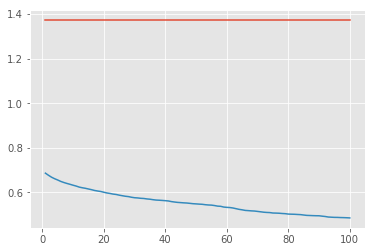

In [41]:
test_score = np.empty(len(gbc.estimators_))
for i, pred in enumerate(gbc.staged_predict(X_test)):
    test_score[i] = gbc.loss_(y_test, y_test_prob2)
plt.plot(np.arange(100) + 1, test_score, label='Test')
plt.plot(np.arange(100) + 1, gbc.train_score_, label='Train')

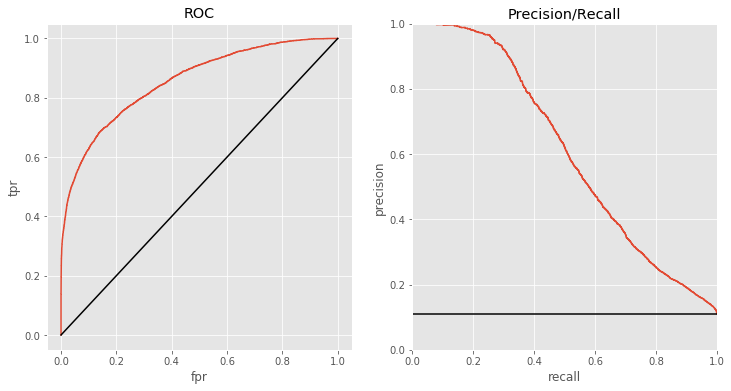

In [42]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
df = calculate_threshold_values(probs_test2[:,1], y_test)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)

In [43]:
feature_importance = gbc.feature_importances_

In [44]:
features = [   'MonthlyPremium',
               'TotalNumberOfClaims',
               'CustomerPaidAmount',
               'DaysToClaim',
               'TotalPolicyHolderPaid']

feature_names = ('MonthlyPremium',
               'ClaimedAmount',
               'PaidAmount',
               'EnrollMonth',
               'EnrollDay',
               'ClaimMonth',
               'ClaimDay',
               'TotalNumberOfClaims',
               'CustomerPaidAmount',
               'DaysToClaim',
               'TotalPolicyHolderPaid')

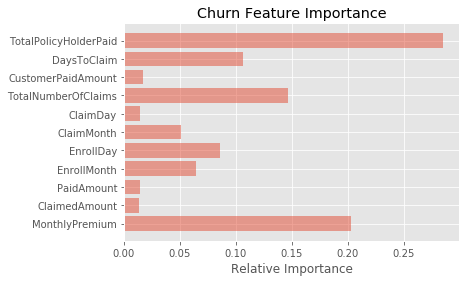

In [63]:
y_pos = np.arange(len(feature_names))
plt.barh(y_pos, feature_importance, align='center', alpha=0.5)
plt.yticks(y_pos, feature_names)
plt.xlabel('Relative Importance')
plt.title('Churn Feature Importance')
plt.savefig('churnimportance.jpg')

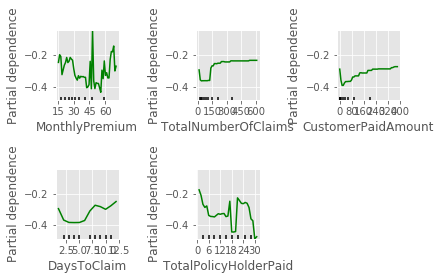

In [64]:
figs, axes = part.plot_partial_dependence(gbc, X_train, features, feature_names=features, grid_resolution=50)
plt.tight_layout()
plt.savefig('partialdependency.png')

In [47]:
insurance['PredictedProbabilityOfChurn'] = gbc.predict_proba(insurance[['MonthlyPremium',
                                                                       'ClaimedAmount',
                                                                       'PaidAmount',
                                                                       'EnrollMonth',
                                                                       'EnrollDay',
                                                                       'ClaimMonth',
                                                                       'ClaimDay',
                                                                       'TotalNumberOfClaims',
                                                                       'CustomerPaidAmount',
                                                                       'DaysToClaim',
                                                                       'TotalPolicyHolderPaid']])[:,1]

In [48]:
insurance['PredictedProbabilityOfChurn'] = np.where(insurance['Churn'] == 1, 0, insurance['PredictedProbabilityOfChurn'])

In [49]:
insurance['PredictedProbabilityOfChurn'].argmax()

68652

In [50]:
insurance.ix[insurance['PredictedProbabilityOfChurn'].idxmax()]

/Users/nathancho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


PolicyId                                    904484
EnrollDate                     2016-07-06 00:00:00
CancelDate                     1970-01-01 00:00:00
MonthlyPremium                              131.05
ClaimDate                      2016-07-21 00:00:00
ClaimedAmount                               170.84
PaidAmount                                       0
EnrollYear                                    2016
EnrollMonth                                      7
EnrollDay                                        6
ClaimYear                                     2016
ClaimMonth                                       7
ClaimDay                                        21
Churn                                            0
TotalNumberOfClaims                              3
CustomerPaidAmount                          170.84
DaysToClaim                                     15
TotalPolicyHolderPaid                       263.88
PredictedProbabilityOfChurn               0.674272
Name: 68652, dtype: object

In [51]:
np.argmax(insurance['PredictedProbabilityOfChurn'].values)

68652

In [55]:
practice = insurance[insurance['PolicyId'] == 718230]

In [58]:
practice

,PolicyId,EnrollDate,CancelDate,MonthlyPremium,ClaimDate,ClaimedAmount,PaidAmount,EnrollYear,EnrollMonth,EnrollDay,ClaimYear,ClaimMonth,ClaimDay,Churn,TotalNumberOfClaims,CustomerPaidAmount,DaysToClaim,TotalPolicyHolderPaid,PredictedProbabilityOfChurn
144856,718230,2015-09-01,1970-01-01,82.8,2016-02-09,315.23,98.49,2015,9,1,2016,2,9,0,30.0,216.74,161,895.45,0.056789
144857,718230,2015-09-01,1970-01-01,82.8,2016-02-12,23.81,10.71,2015,9,1,2016,2,12,0,30.0,13.10,164,895.45,0.058997
144858,718230,2015-09-01,1970-01-01,82.8,2016-02-16,21.43,10.71,2015,9,1,2016,2,16,0,30.0,10.72,168,895.45,0.058997
144859,718230,2015-09-01,1970-01-01,82.8,2016-02-19,36.60,20.07,2015,9,1,2016,2,19,0,30.0,16.53,171,895.45,0.058997
144860,718230,2015-09-01,1970-01-01,82.8,2016-02-25,22.15,11.37,2015,9,1,2016,2,25,0,30.0,10.78,177,895.45,0.059242
144861,718230,2015-09-01,1970-01-01,82.8,2016-02-29,9.05,8.15,2015,9,1,2016,2,29,0,30.0,0.90,181,895.45,0.056783
144862,718230,2015-09-01,1970-01-01,82.8,2016-02-23,50.18,22.22,2015,9,1,2016,2,23,0,30.0,27.96,175,895.45,0.056476
144863,718230,2015-09-01,1970-01-01,82.8,2016-03-21,414.17,372.75,2015,9,1,2016,3,21,0,30.0,41.42,202,895.45,0.076486
144864,718230,2015-09-01,1970-01-01,82.8,2016-03-23,22.15,11.37,2015,9,1,2016,3,23,0,30.0,10.78,204,895.45,0.073200
144865,718230,2015-09-01,1970-01-01,82.8,2016-03-17,53.12,30.66,2015,9,1,2016,3,17,0,30.0,22.46,198,895.45,0.071436


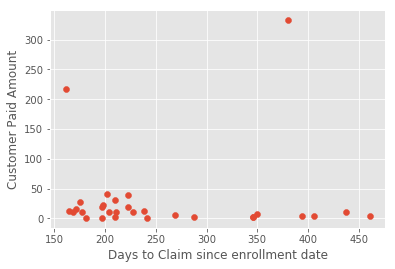

In [62]:
plt.scatter(practice['DaysToClaim'], practice['CustomerPaidAmount'] )
plt.xlabel('Days to Claim since enrollment date')
plt.ylabel('Customer Paid Amount')
plt.savefig('policy718230.jpg')

In [66]:
np.argmax(insurance['PredictedProbabilityOfChurn'])

68652

In [68]:
insurance[68652:]

,PolicyId,EnrollDate,CancelDate,MonthlyPremium,ClaimDate,ClaimedAmount,PaidAmount,EnrollYear,EnrollMonth,EnrollDay,ClaimYear,ClaimMonth,ClaimDay,Churn,TotalNumberOfClaims,CustomerPaidAmount,DaysToClaim,TotalPolicyHolderPaid,PredictedProbabilityOfChurn
68652,904484,2016-07-06,1970-01-01,131.05,2016-07-21,170.84,0.00,2016,7,6,2016,7,21,0,3.0,170.84,15,263.88,0.674272
68653,904484,2016-07-06,1970-01-01,131.05,2016-08-18,86.70,57.24,2016,7,6,2016,8,18,0,3.0,29.46,43,263.88,0.241103
68654,904484,2016-07-06,1970-01-01,131.05,2016-08-18,332.71,269.13,2016,7,6,2016,8,18,0,3.0,63.58,43,263.88,0.260334
68655,904537,2016-07-06,2016-11-20,24.66,2016-09-26,98.69,0.00,2016,7,6,2016,9,26,1,1.0,98.69,82,98.69,0.000000
68656,270380,2012-11-28,1970-01-01,21.18,2016-08-31,90.02,0.00,2012,11,28,2016,8,31,0,3.0,90.02,1372,298.01,0.061454
68657,270380,2012-11-28,1970-01-01,21.18,2016-09-03,163.39,0.00,2012,11,28,2016,9,3,0,3.0,163.39,1375,298.01,0.067050
68658,270380,2012-11-28,1970-01-01,21.18,2016-09-03,44.60,0.00,2012,11,28,2016,9,3,0,3.0,44.60,1375,298.01,0.051942
68659,270898,2012-11-29,1970-01-01,49.26,2016-12-12,151.38,0.00,2012,11,29,2016,12,12,0,1.0,151.38,1474,151.38,0.028359
68660,270916,2012-11-29,1970-01-01,18.55,2016-12-27,127.02,66.23,2012,11,29,2016,12,27,0,6.0,60.79,1489,297.34,0.014750
68661,270916,2012-11-29,1970-01-01,18.55,2016-12-09,79.50,0.00,2012,11,29,2016,12,9,0,6.0,79.50,1471,297.34,0.018223
